In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats
from scipy.stats import t

In [2]:
df = pd.read_excel('outputwithoutvybr.xlsx')
df = df[df['is_vybr'] == 0]
df

,Unnamed: 0,id,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,...,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто,is_vybr,agecat,int_cat
0,0,0,1889,Москва,Москва,50,M,2023-04-01 00:00:00,18993.0,99900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
1,1,1,1889,Москва,Москва,50,M,2023-05-01 00:00:00,37807.0,92424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
2,2,2,1889,Москва,Москва,50,M,2023-06-01 00:00:00,20791.0,124800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
3,3,3,1889,Москва,Москва,50,M,2023-07-01 00:00:00,131129.0,18060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
4,4,4,1889,Москва,Москва,50,M,2023-08-01 00:00:00,44096.0,198480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59815,59815,59815,1003493065,Республика Карелия,Петрозаводск,42,M,2023-05-01 00:00:00,18228.0,153096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59816,59816,59816,1003493065,Республика Карелия,Петрозаводск,42,M,2023-06-01 00:00:00,24807.0,163884.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59817,59817,59817,1003493065,Республика Карелия,Петрозаводск,42,M,2023-07-01 00:00:00,16195.0,143451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59818,59818,59818,1003493065,Республика Карелия,Петрозаводск,42,M,2023-08-01 00:00:00,23215.0,88242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2


In [3]:
for i in ['оборот_аптеки', 'оборот_рестораны',
       'оборот_одежда_и_обувь', 'оборот_автоуслуги', 'оборот_супермаркеты',
       'оборот_такси', 'оборот_красота', 'оборот_развлечения',
       'оборот_жд_билеты', 'оборот_образование', 'оборот_дом_и_ремонт',
       'оборот_спорттовары', 'оборот_животные', 'оборот_цветы',
       'оборот_фастфуд', 'оборот_каршеринг', 'оборот_аренда_авто','кэшбэк_аптеки', 'кэшбэк_рестораны',
       'кэшбэк_одежда_и_обувь', 'кэшбэк_автоуслуги', 'кэшбэк_супермаркеты',
       'кэшбэк_такси', 'кэшбэк_красота', 'кэшбэк_развлечения',
       'кэшбэк_жд_билеты', 'кэшбэк_образование', 'кэшбэк_дом_и_ремонт',
       'кэшбэк_спорттовары', 'кэшбэк_животные', 'кэшбэк_цветы',
       'кэшбэк_фастфуд', 'кэшбэк_каршеринг', 'кэшбэк_аренда_авто']:
    df[i] = df[i].fillna(0)

In [4]:
int_age_cat_to_cat = {0: '14-24', 1: '25-40', 2: '41-56', 3: '57-75', 4: '76+'}
categories = []
for i in df.columns:
  if i.startswith('оборот_'):
    categories.append(i[7:])
selected_categories = {}
for age_int_cat in range(5):
    df_aged = df[df['int_cat'] == age_int_cat]
    result_df = pd.DataFrame(columns=['Category', 'mean', 'median', 'activations', 'proposed'])
    for cat in categories:
        mean = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].mean())) else df_aged[['оборот_'+cat]].mean())
        median = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].median())) else df_aged[['оборот_'+cat]].median())
        activations = len(df_aged[df_aged['активация_кэшбэка_'+cat] == 1])
        proposed = len(df_aged[(df_aged['активация_кэшбэка_'+cat] == 1) | (df_aged['активация_кэшбэка_'+cat] == 0)])

        new_row = pd.DataFrame({'Category': [cat], 'mean': [mean], 'median': [median], 'activations': [activations], 'proposed': [proposed]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)


    result_df = result_df.sort_values(by='proposed')

    selected_categories[age_int_cat] = list(result_df['Category'])[::-1][:10]
    print(str(df_aged['agecat'].iloc[0])+':', list(result_df['Category'])[::-1][:10])

14-24: ['аптеки', 'развлечения', 'жд_билеты', 'одежда_и_обувь', 'красота', 'цветы', 'рестораны', 'такси', 'спорттовары', 'образование']
25-40: ['аптеки', 'развлечения', 'красота', 'жд_билеты', 'одежда_и_обувь', 'рестораны', 'цветы', 'спорттовары', 'автоуслуги', 'образование']
41-56: ['аптеки', 'развлечения', 'красота', 'рестораны', 'одежда_и_обувь', 'жд_билеты', 'цветы', 'автоуслуги', 'спорттовары', 'образование']
57-75: ['аптеки', 'развлечения', 'красота', 'цветы', 'жд_билеты', 'рестораны', 'одежда_и_обувь', 'спорттовары', 'автоуслуги', 'образование']
76+: ['аптеки', 'рестораны', 'развлечения', 'автоуслуги', 'животные', 'цветы', 'супермаркеты', 'жд_билеты', 'красота', 'одежда_и_обувь']


alpha = 0.05:
14-24: H0: 0/10, H1: 10/10 (аптеки, развлечения, жд_билеты, одежда_и_обувь, красота, цветы, рестораны, такси, спорттовары, образование)
25-40: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, жд_билеты, одежда_и_обувь, рестораны, цветы, спорттовары, автоуслуги, образование)
41-56: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, рестораны, одежда_и_обувь, жд_билеты, цветы, автоуслуги, спорттовары, образование)
57-75: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, цветы, жд_билеты, рестораны, одежда_и_обувь, спорттовары, автоуслуги, образование)
76+: H0: 5/10, H1: 5/10 (рестораны, развлечения, автоуслуги, супермаркеты, жд_билеты)


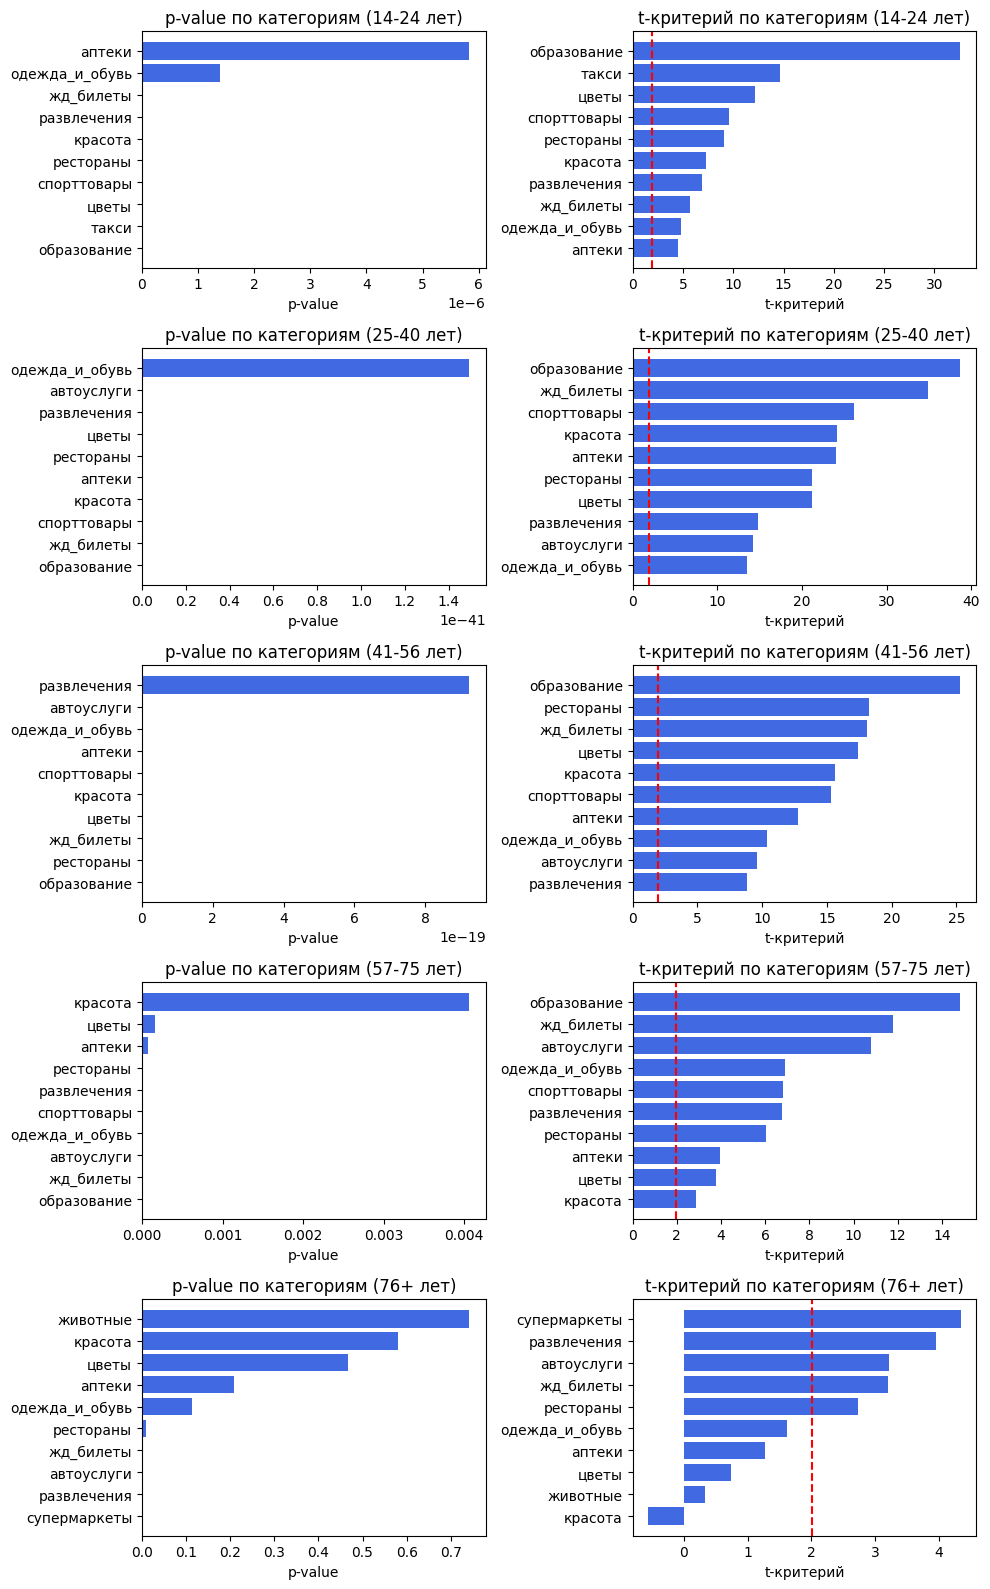

2.0128955952945886
alpha = 0.01:
14-24: H0: 0/10, H1: 10/10 (аптеки, развлечения, жд_билеты, одежда_и_обувь, красота, цветы, рестораны, такси, спорттовары, образование)
25-40: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, жд_билеты, одежда_и_обувь, рестораны, цветы, спорттовары, автоуслуги, образование)
41-56: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, рестораны, одежда_и_обувь, жд_билеты, цветы, автоуслуги, спорттовары, образование)
57-75: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, цветы, жд_билеты, рестораны, одежда_и_обувь, спорттовары, автоуслуги, образование)
76+: H0: 5/10, H1: 5/10 (рестораны, развлечения, автоуслуги, супермаркеты, жд_билеты)


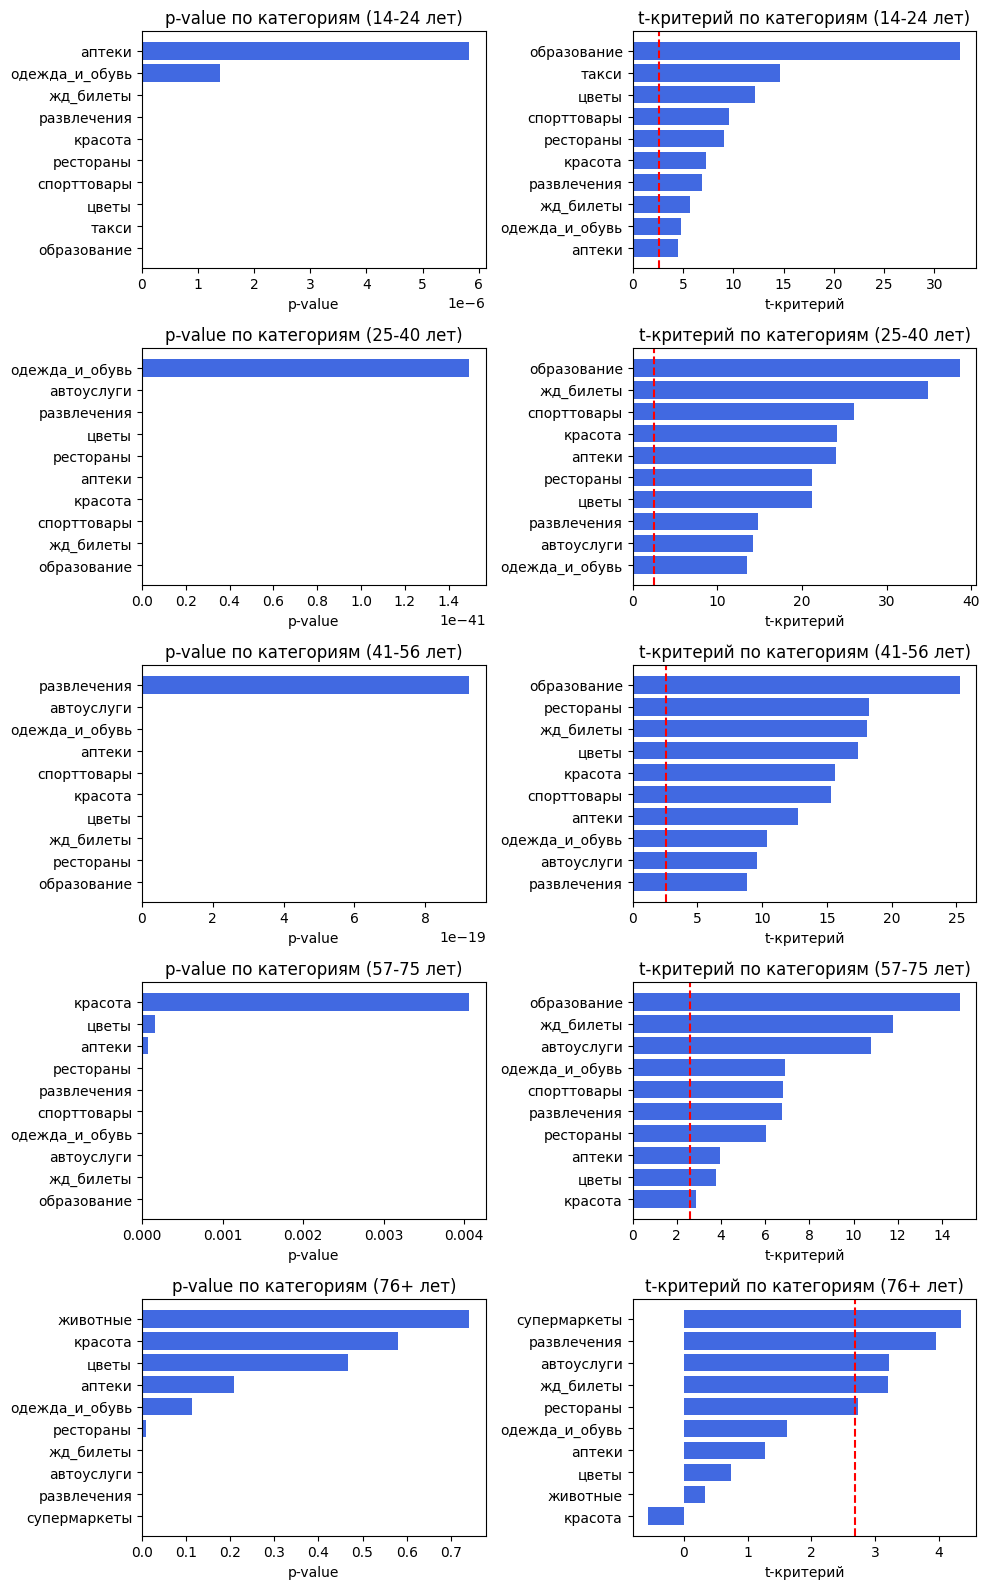

2.6870134922422126
alpha = 0.001:
14-24: H0: 0/10, H1: 10/10 (аптеки, развлечения, жд_билеты, одежда_и_обувь, красота, цветы, рестораны, такси, спорттовары, образование)
25-40: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, жд_билеты, одежда_и_обувь, рестораны, цветы, спорттовары, автоуслуги, образование)
41-56: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, рестораны, одежда_и_обувь, жд_билеты, цветы, автоуслуги, спорттовары, образование)
57-75: H0: 1/10, H1: 9/10 (аптеки, развлечения, цветы, жд_билеты, рестораны, одежда_и_обувь, спорттовары, автоуслуги, образование)
76+: H0: 8/10, H1: 2/10 (развлечения, супермаркеты)


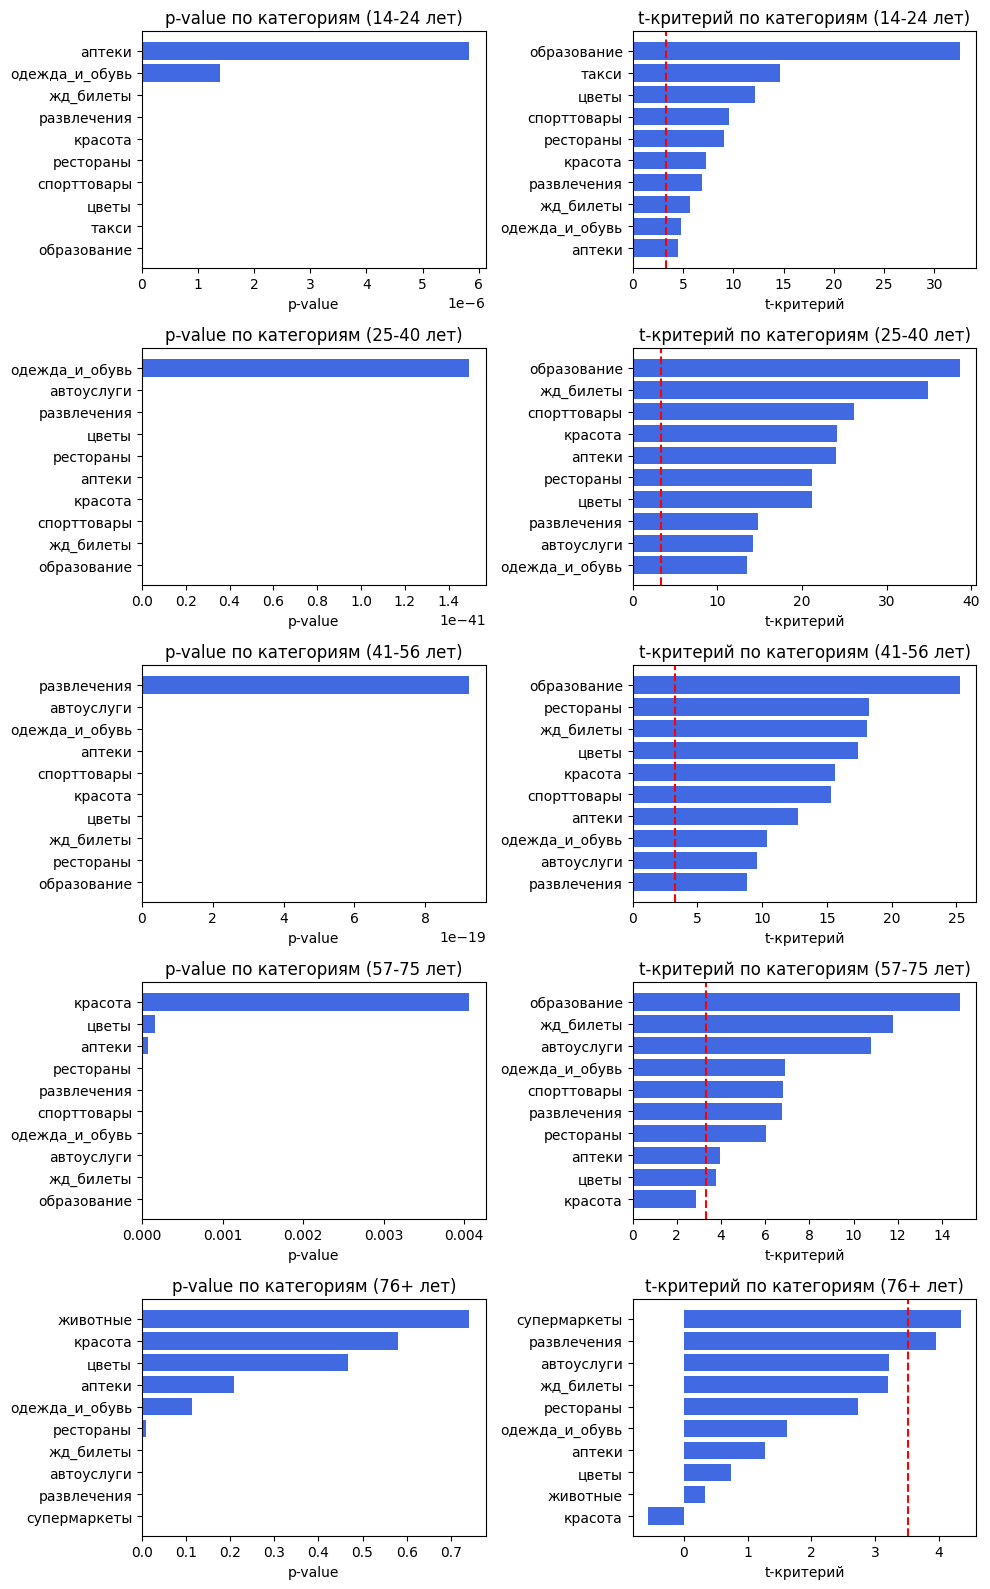

3.514957205481079


In [23]:
for alpha in [0.05, 0.01, 0.001]:
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 16))
    print(f'alpha = {alpha}:')
    for i in range(5):
        count = 0
        ar = []
        tp = []
        for cat in selected_categories[i]:
            df_age_group = df[df['int_cat'] == i]

            a = df_age_group[df_age_group['активация_кэшбэка_' + cat] == 1]['оборот_' + cat]
            b = df_age_group[df_age_group['активация_кэшбэка_' + cat] != 1]['оборот_' + cat]
            t_ob, p = stats.ttest_ind(a, b)
            degrees_of_freedom = stats.ttest_ind(a, b).df

            t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

            if abs(t_ob) > abs(t_critical): # H1
                count += 1
                ar.append(cat)
            else: # H0
                pass
            tp.append((t_ob, p))

        print(f'{int_age_cat_to_cat[i]}: H0: {len(selected_categories[i])-count}/{len(selected_categories[i])}, H1: {count}/{len(selected_categories[i])} ({", ".join(ar)})')

        sorted_lists = sorted(list(zip(selected_categories[i], [v[1] for v in tp])), key=lambda x: x[1])
        selected_categories_sorted, p_sorted = zip(*sorted_lists)

        axes[i, 0].barh(selected_categories_sorted, p_sorted, color='royalblue')
        axes[i, 0].set_xlabel('p-value')
        axes[i, 0].set_title(f'p-value по категориям ({int_age_cat_to_cat[i]} лет)')

        sorted_lists = sorted(list(zip(selected_categories[i], [v[0] for v in tp])), key=lambda x: x[1])
        selected_categories_sorted, t_sorted = zip(*sorted_lists)

        axes[i, 1].barh(selected_categories_sorted, t_sorted, color='royalblue')
        axes[i, 1].set_xlabel('t-критерий')
        axes[i, 1].set_title(f't-критерий по категориям ({int_age_cat_to_cat[i]} лет)')

        axes[i, 1].axvline(x=t_critical, color='red', linestyle='--', label='t_critical')


    plt.tight_layout()
    plt.show()
    print(t_critical)

alpha = 0.05:
14-24: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
25-40: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
41-56: H0: 1/17, H1: 16/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг, аренда_авто)
57-75: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
76+: H0: 10/17, H1: 7/17 (рестораны, автоуслуги, супермаркеты, развлечения, жд_билеты, образование, дом_и_ремонт)


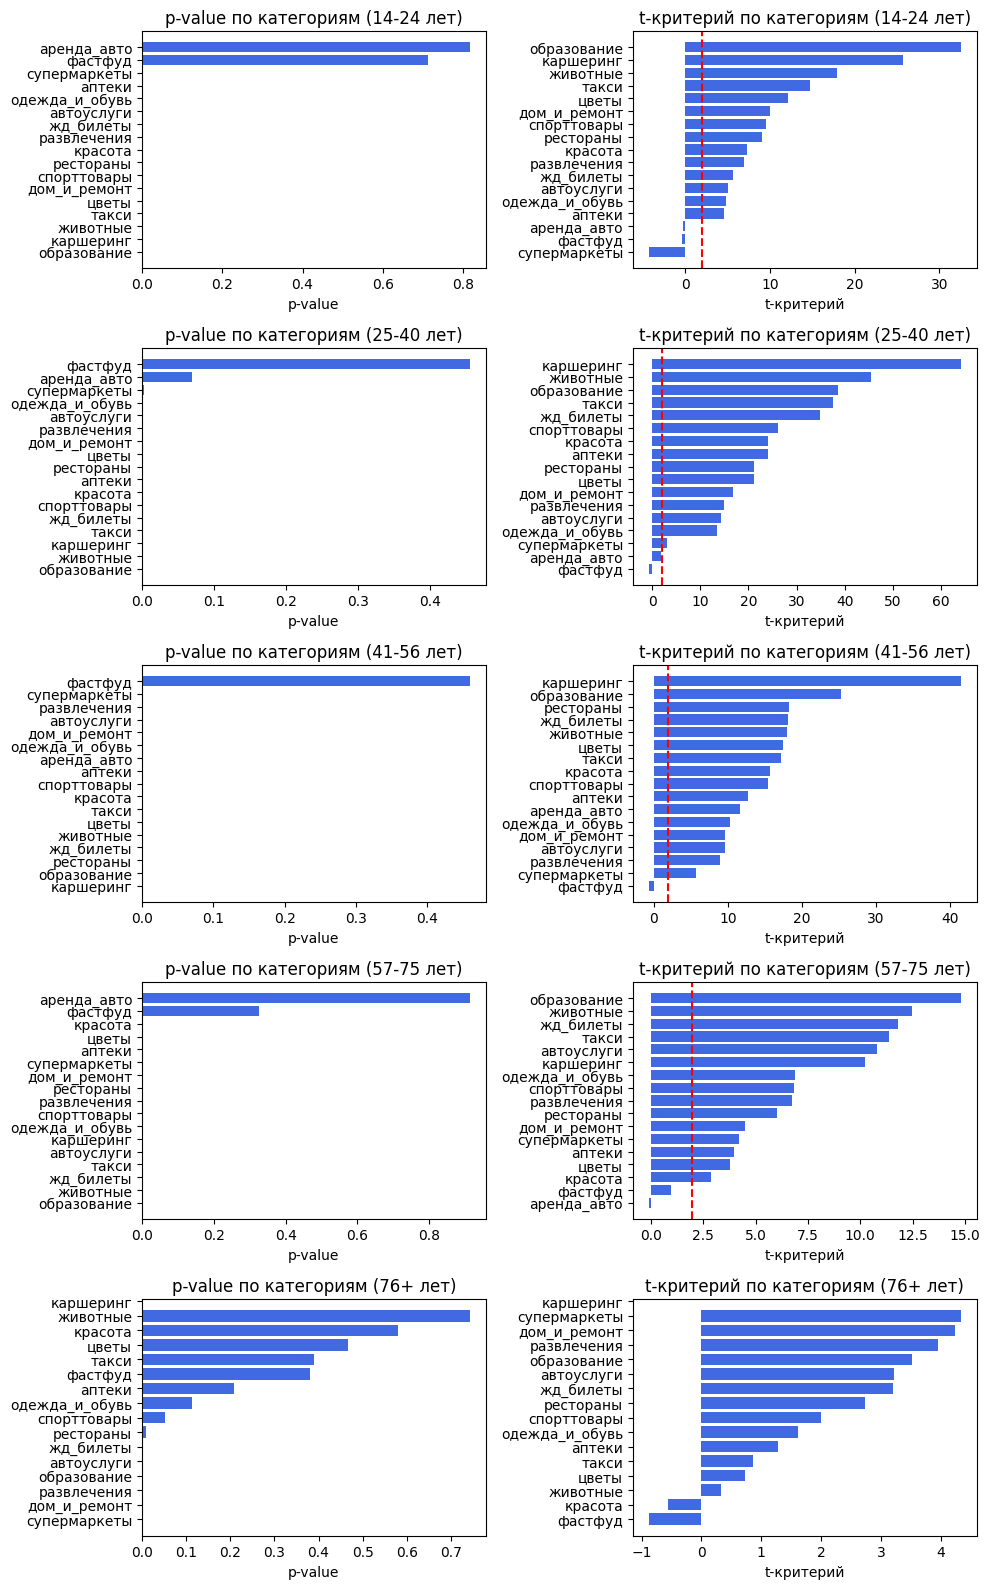

nan
alpha = 0.01:
14-24: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
25-40: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
41-56: H0: 1/17, H1: 16/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг, аренда_авто)
57-75: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
76+: H0: 10/17, H1: 7/17 (рестораны, автоуслуги, супермаркеты, развлечения, жд_билеты, образование, дом_и_ремонт)


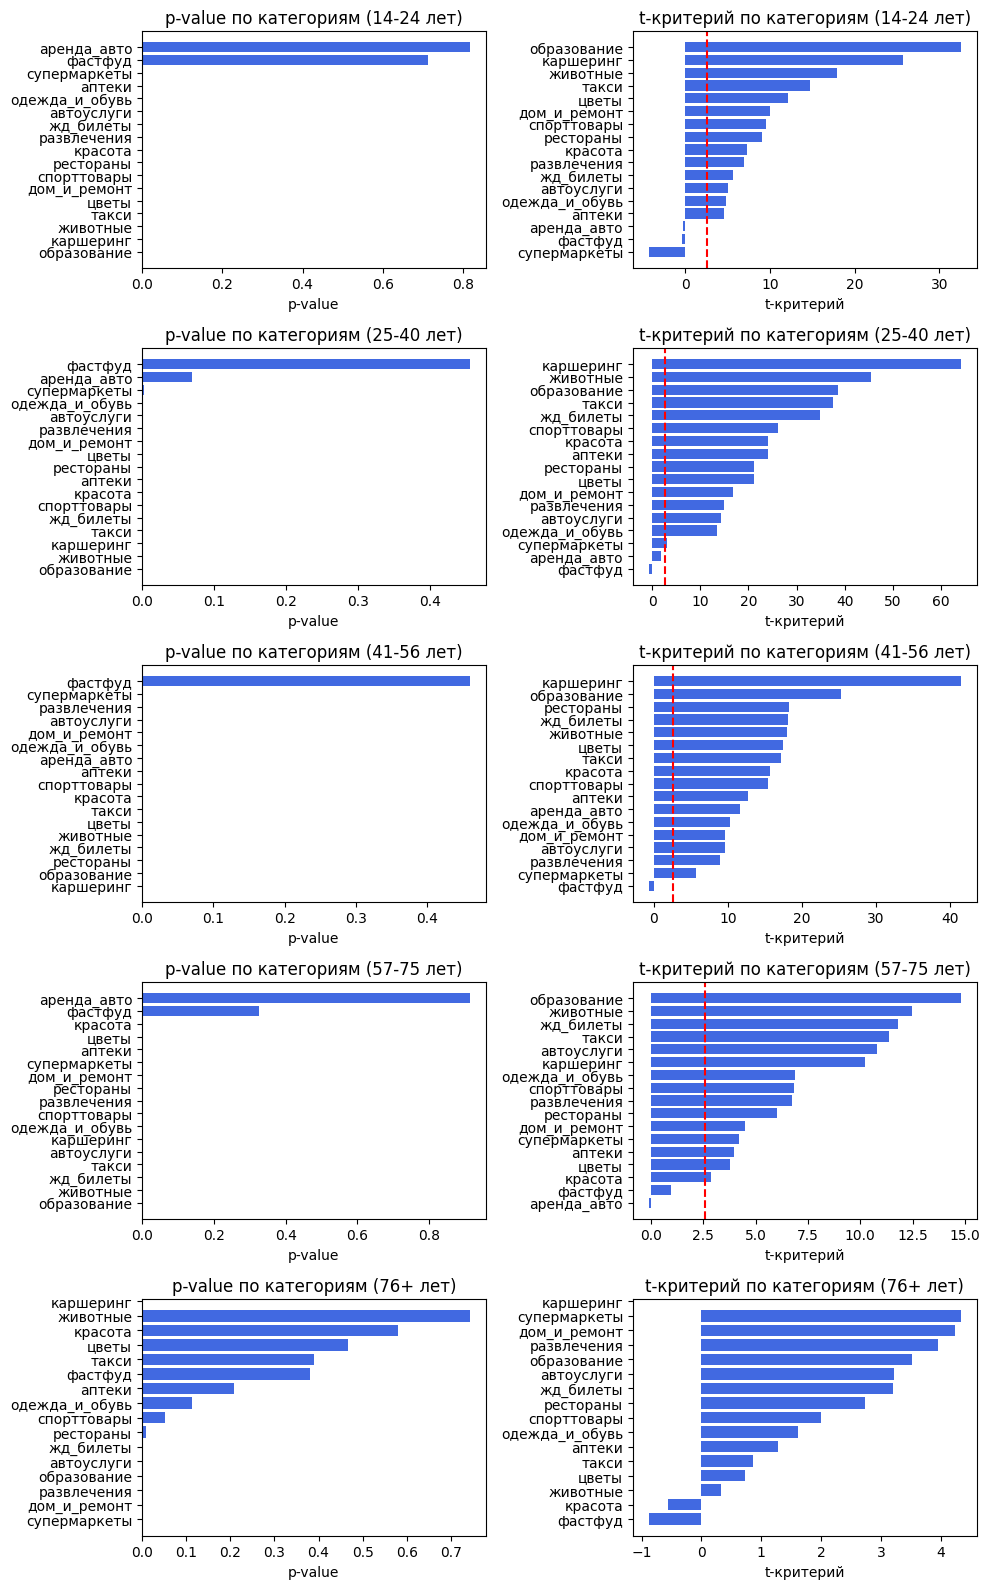

nan
alpha = 0.001:
14-24: H0: 2/17, H1: 15/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
25-40: H0: 3/17, H1: 14/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
41-56: H0: 1/17, H1: 16/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг, аренда_авто)
57-75: H0: 3/17, H1: 14/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг)
76+: H0: 13/17, H1: 4/17 (супермаркеты, развлечения, образование, дом_и_ремонт)


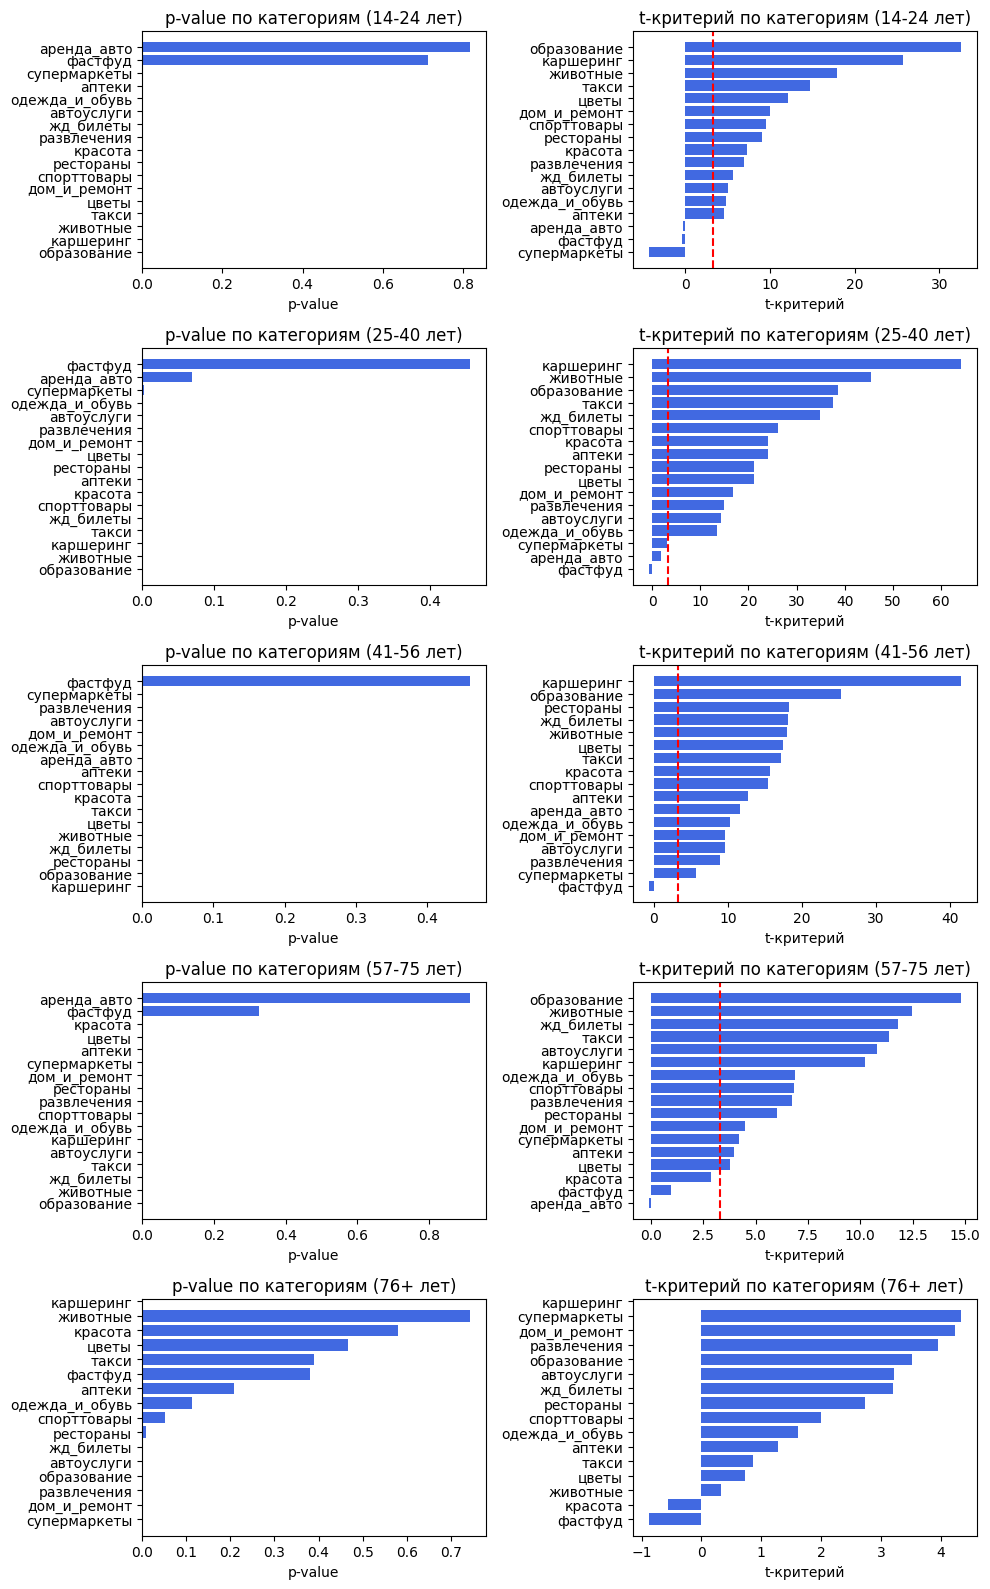

nan


In [20]:
for alpha in [0.05, 0.01, 0.001]:
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 16))
    print(f'alpha = {alpha}:')
    for i in range(5):
        count = 0
        ar = []
        tp = []
        for cat in categories:
            df_age_group = df[df['int_cat'] == i]

            a = df_age_group[df_age_group['активация_кэшбэка_' + cat] == 1]['оборот_' + cat]
            b = df_age_group[df_age_group['активация_кэшбэка_' + cat] != 1]['оборот_' + cat]
            t_ob, p = stats.ttest_ind(a, b)
            degrees_of_freedom = stats.ttest_ind(a, b).df

            t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

            if abs(t_ob) > abs(t_critical): # H1
                count += 1
                ar.append(cat)
            else: # H0
                pass
            tp.append((t_ob, p))

        print(f'{int_age_cat_to_cat[i]}: H0: {len(categories)-count}/{len(categories)}, H1: {count}/{len(categories)} ({", ".join(ar)})')

        sorted_lists = sorted(list(zip(categories, [v[1] for v in tp])), key=lambda x: x[1])
        selected_categories_sorted, p_sorted = zip(*sorted_lists)

        axes[i, 0].barh(selected_categories_sorted, p_sorted, color='royalblue')
        axes[i, 0].set_xlabel('p-value')
        axes[i, 0].set_title(f'p-value по категориям ({int_age_cat_to_cat[i]} лет)')

        sorted_lists = sorted(list(zip(categories, [v[0] for v in tp])), key=lambda x: x[1])
        selected_categories_sorted, t_sorted = zip(*sorted_lists)

        axes[i, 1].barh(selected_categories_sorted, t_sorted, color='royalblue')
        axes[i, 1].set_xlabel('t-критерий')
        axes[i, 1].set_title(f't-критерий по категориям ({int_age_cat_to_cat[i]} лет)')

        axes[i, 1].axvline(x=t_critical, color='red', linestyle='--', label='t_critical')


    plt.tight_layout()
    plt.show()
    print(t_critical)

In [ ]:
for alpha in [0.05, 0.01, 0.001]:
    print(f'alpha = {alpha}:')
    count = 0
    ar = []
    ps = pd.Series(dtype='float64')
    for cat in categories:
        a = df[df['активация_кэшбэка_' + cat] == 1]['оборот_' + cat]
        b = df[df['активация_кэшбэка_' + cat] != 1]['оборот_' + cat]
        t_ob, p = stats.ttest_ind(a, b)
        degrees_of_freedom = stats.ttest_ind(a, b).df

        t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

        if abs(t_ob) > abs(t_critical): # H1 correct
            count += 1
            ar.append(cat)
            ps[cat] = t_ob
        else: # H0 correct
            pass
    print(f'H0: {len(categories)-count}/{len(categories)}, H1: {count}/{len(categories)} ({", ".join(ar)})')

    fig, axes = plt.subplots(figsize=(6, 4))

    ps = ps.sort_values()
    axes.barh(ps.index, list(ps))
    axes.set_xlabel('t-критерий')
    axes.set_title('t-критерий по категориям')
    # Автоматическое выравнивание макета
    plt.tight_layout()

    plt.show()